# Ultra Wide Band positioning literature analysis 

The real case for analyzing UWB indoor positioning system literature

 - 115 journal articles from years 2019-2021 matching search terms "UWB positioning" were downloaded from IEEE explorer as PDF and converted to plain text using pdftotext in linux.

In [16]:
# Standard libraries to be used
import glob
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

# A regular experssion library. This is very usefull for text processing
import re

# Import the NLTK library
import nltk
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
from nltk import FreqDist

import gensim
from gensim import corpora
import pyLDAvis
#from pyLDAvis import gensim_models

## Import corpus

In [43]:
lemmatizer = WordNetLemmatizer()
#stop_words_fin = set(stopwords.words("finnish"))
stop_words = set(stopwords.words("english"))


# A real case, 115 recent research journal articles about "UWB positioning" from IEEE Explorer
# Bulk downloaded PDF's and converted to text with pdftotext
filenames=[fn.split('/')[-1] for fn in glob.glob('corpus_txt/*.txt')]
uwb=PlaintextCorpusReader('corpus_txt/', filenames)
punctuations=set([',','.','!','?','@', '%', ':', ';'])
morewords=set(['ieee', 'transaction', 'journal', 'vol'])
unnecessary=stop_words.union(punctuations).union(morewords)

docs=[]
words=[]
for document in uwb.fileids():
    tokens = gensim.utils.simple_preprocess(uwb.raw(document))
    meaningful_words = [word for word in tokens if word not in unnecessary]
    lemmatized = [lemmatizer.lemmatize(word) for word in meaningful_words]
    docs.append(lemmatized)
    words.extend(lemmatized)
print(len(docs))
for i in range(len(docs)):
    print(i, docs[i][:10])

115
0 ['transaction', 'geoscience', 'remote', 'sensing', 'february', 'sar', 'processing', 'without', 'motion', 'measurement']
1 ['sensor', 'august', 'high', 'accuracy', 'indoor', 'localization', 'system', 'application', 'based', 'tightly']
2 ['transaction', 'cybernetics', 'june', 'ultra', 'wideband', 'odometry', 'based', 'cooperative', 'relative', 'localization']
3 ['microwave', 'wireless', 'component', 'letter', 'november', 'ir', 'uwb', 'angle', 'arrival', 'sensor']
4 ['antenna', 'wireless', 'propagation', 'letter', 'march', 'position', 'information', 'indexed', 'classifier', 'improved']
5 ['special', 'section', 'gnss', 'localization', 'navigation', 'technology', 'date', 'current', 'version', 'september']
6 ['transaction', 'instrumentation', 'measurement', 'august', 'resetting', 'approach', 'in', 'uwb', 'sensor', 'fusion']
7 ['transaction', 'mobile', 'computing', 'august', 'algorithm', 'position', 'optimization', 'decentralized', 'localization', 'platform']
8 ['sensor', 'april', 'dete

In [44]:
text = nltk.Text(words)

In [45]:
dictionary = corpora.Dictionary(docs)

In [323]:
text.concordance('uwb')

Displaying 25 of 5759 matches:
pplied successfully two ultrawideband uwb data set acquired carabas ii system h
strate possible process ultrawideband uwb vhf data without knowing relative tra
set suffice fga algorithm applied two uwb data set acquired carabas ii system v
ment carabas ii sar system carabas ii uwb sar system center frequency mhz vhf b
like target hence conceivable process uwb vhf data without knowing relative tra
ovel approach apply fga algorithm two uwb data set acquired carabas ii system v
tem application based tightly coupled uwb in floor map integration changqiang w
tioning particular use ultra wideband uwb technology ranging emerging effective
 accuracy improve overall performance uwb system combining uwb technology inert
rall performance uwb system combining uwb technology inertial navigation system
d indoor positioning approach however uwb measurement affected outlier nlos pro
ilter algorithm based tightly coupled uwb in floor map integration proposed noi
 floor ma

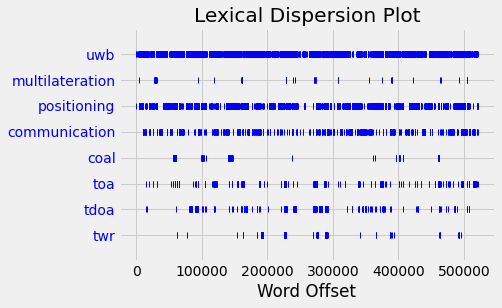

In [51]:
text.dispersion_plot(['uwb', 'multilateration', 'positioning', 'communication', 'coal', 'toa', 'tdoa', 'twr'])

In [52]:
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 20396
Number of documents: 115


In [12]:
temp = dictionary[0] 

In [13]:
# Latent Dirichlet Allocation
id2word = dictionary.id2token
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=2000,
                                           passes=10,
                                           alpha='auto',
                                           eta = 'auto',
                                           iterations=100,
                                           eval_every=1)

In [17]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary);

/home/petri/venv/python3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/home/petri/venv/python3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/petri/venv/python3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/petri/venv/python3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/petri/venv/python3/lib/python3.9/site-packag

In [18]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.079008 -0.031535       1        1  25.480504
7     -0.049723  0.006918       2        1  12.982872
4     -0.063619 -0.023932       3        1  11.893930
8      0.062293  0.048061       4        1  11.342758
2     -0.077090 -0.060680       5        1   9.703660
1     -0.032926 -0.019114       6        1   7.796294
6      0.046568  0.063983       7        1   6.835235
9     -0.001115 -0.028194       8        1   5.991622
3      0.195880 -0.075713       9        1   4.283456
0     -0.001260  0.120207      10        1   3.689670, topic_info=          Term         Freq        Total Category  logprob  loglift
56     antenna  2002.000000  2002.000000  Default  30.0000  30.0000
81       array   659.000000   659.000000  Default  29.0000  29.0000
1116       tag  1154.000000  1154.000000  Default  28.0000  28.0000
1020    signal  2580.000000  2580.000000  Default  27.0000  27.0000
885      radar   791.000000   791.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
943     result    73.915018  1940.358597  Topic10  -5.5614   0.0319
40          al    66.119104  1095.403398  Topic10  -5.6729   0.4922
305   distance    63.221827  1734.447894  Topic10  -5.7177  -0.0122
379         et    61.353420  1085.585944  Topic10  -5.7477   0.4264
705      model    62.577645  1865.199265  Topic10  -5.7279  -0.0951

[835 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
5          1  0.797122  acceleration
5          2  0.002596  acceleration
5          3  0.012982  acceleration
5          4  0.064912  acceleration
5          5  0.083088  acceleration
...      ...       ...           ...
10696      4  0.986644            στ
11866      1  0.049039            φk
11866      2  0.907224            φk
11866      3  0.012260            φk
11866      7  0.012260            φk

[2610 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 8, 5, 9, 3, 2, 7, 10, 4, 1])

## TF IDF model

Term Frequency Inverse Document Frequency

In [80]:
from gensim.models import TfidfModel
from gensim.corpora import Dictionary

uwbdictionary = Dictionary(docs)
tfidf_model = TfidfModel(dictionary=uwbdictionary)


In [85]:
# Transformed corpus
tform_corpus = tfidf_model[corpus]


In [86]:
# Create sparse matrix (design matrix)
sparse = gensim.matutils.corpus2csc(tform_corpus)


In [22]:
# Make it to normal matrix
tfidf_matrix = spar_matr.toarray().transpose()


## Kmeans clustering

In [23]:
from sklearn.cluster import KMeans
kmodel = KMeans(n_clusters=10)

kmodel.fit(tfidf_matrix)

clusters = kmodel.labels_.tolist()

In [24]:
centroids = kmodel.cluster_centers_.argsort()[:, ::-1] # Sort the words according to their importance.

for i in range(10):
    j=i+1
    print("Cluster %d words:" % j, end='')
    for ind in centroids[i, :10]:
        print(' %s' % dictionary.id2token[ind],end=',')
    print()
    print()

Cluster 1 words: pdr, heading, pedestrian, walking, ipda, usv, nlos, ship, acceleration, cart,

Cluster 2 words: rha, body, anc, rl, chest, qlos, otim, doo, wearable, tag,

Cluster 3 words: b, bs, στ, pl, link, limb, elderly, pdoa, dop, wearable,

Cluster 4 words: antenna, vivaldi, gm, polarization, cavity, tsa, reflector, uhf, isolation, stub,

Cluster 5 words: anchor, uav, robot, tag, agv, imu, ape, agvs, lte, deeptal,

Cluster 6 words: in, nlos, pedestrian, gnss, particle, skf, compensation, gmm, map, dropout,

Cluster 7 words: tdc, mppm, vwb, pulse, bit, toggle, td, transceiver, demodulation, ppm,

Cluster 8 words: cnn, classification, classifier, nlos, cir, lstm, capsule, layer, gru, convolutional,

Cluster 9 words: twr, node, agent, clock, slot, altds, parent, packet, tdoa, tdma,

Cluster 10 words: array, aperture, ghost, pdoa, image, rsnrtf, fga, imaging, mimo, target,



## Latent Semantic Indexing
Another method of getting topics is the Latent Semantic Indexing

In [309]:
## Latent Semantic Indexing

from gensim.test.utils import common_dictionary, common_corpus
from gensim.models import LsiModel
n_topics=10
lsi = LsiModel(corpus=corpus, id2word=uwbdictionary.id2token, num_topics=n_topics)


In [310]:
# What words defines a topic?
lsi.show_topic(0)

[('uwb', -0.2721675022850441),
 ('system', -0.2721538916905072),
 ('positioning', -0.2070284571870817),
 ('localization', -0.20073255561570497),
 ('based', -0.18396599969329458),
 ('error', -0.17993907828732758),
 ('pp', -0.16307505494239316),
 ('measurement', -0.16191820133213272),
 ('fig', -0.16102906761537045),
 ('position', -0.15176927355663228)]

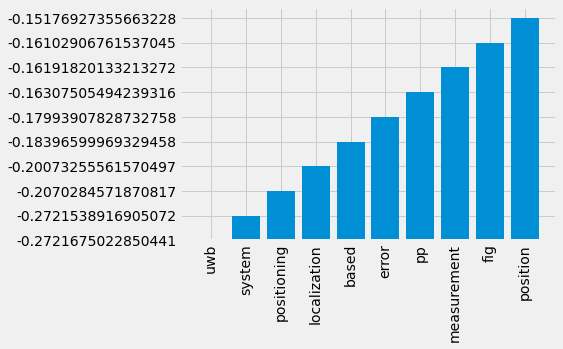

In [311]:
topicno=0
v=np.array(lsi.show_topic(topicno))
plt.bar(x=v[:,0], height=v[:,1], )
plt.xticks(rotation=90);

In [312]:
# Check the membership of an article to the topics
lsi[corpus[0]]

[(0, -116.26664582964072),
 (1, 8.545741368132578),
 (2, 55.48671165359576),
 (3, 21.228311781059837),
 (4, 27.896685507218574),
 (5, -32.053344996126114),
 (6, -25.155524171363506),
 (7, -16.277078738081073),
 (8, -18.357308477895746),
 (9, -11.235655087012871)]

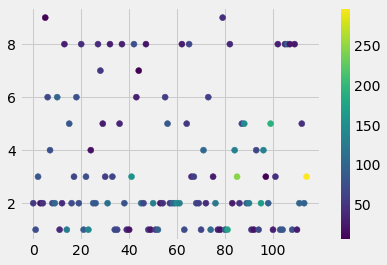

In [313]:
# Find the most probable membership of all articles
N=115
v=np.zeros(N)
c=np.zeros(N)
for i in range(N):
    x=np.array(lsi[corpus[i]])[:,1]
    j=x.argmax()
    v[i]=j
    c[i]=x[j]
plt.scatter(range(N),v,c=c)
plt.colorbar()

In [316]:
# Find documents which highest membership probability = good examples of topics
for i in range(len(filenames)):
    if c[i]>125:
        print(i, v[i], c[i], filenames[i])


14 1.0 129.1795365855178 Integrated Positioning System of Unmanned Automatic Vehicle in Coal Mines.txt
23 1.0 138.09036256711988 A Stable SINS-UWB Integrated Positioning Method of Shearer Based on the Multi-Model Intelligent Switching Algorithm.txt
41 3.0 152.00231671489766 Peer-to-Peer Relative Localization of Aerial Robots With Ultrawideband Sensors.txt
50 2.0 130.1513067816075 Planar Ultra-Wideband and Wide-Scanning Dual-Polarized Phased Array With Integrated Coupled-Marchand Balun for High Polarization Isolation and Low Cross-Polarization.txt
60 2.0 149.781667189539 Generalization of Channel Micro-Doppler Capacity Evaluation for Improved Finer-Grained Human Activity Classification Using MIMO UWB Radar.txt
61 2.0 131.55678785232718 UWB Simultaneous Breathing and Heart Rate Detections in Driving Scenario Using Multi-Feature Alignment Two-Layer EEMD Method.txt
81 1.0 174.97209993380758 Adapted Error Map Based Mobile Robot UWB Indoor Positioning.txt
84 4.0 132.6713778386743 Multiple Ta

In [322]:
# Find samples from each topic, which has the highest membership probability = Best sample of each topic
print("Topic, Membership: filename=title")
idx=np.arange(len(v))
for i in range(1,n_topics):
    j = idx[v==i]
    if len(j)>0:
        k = j[np.argmax(c[j])]
        print("%2d, %3.0f: %s " % (i, c[k], filenames[k]))
    else:
        print(i)


Topic, Membership: filename=title
 1, 175: Adapted Error Map Based Mobile Robot UWB Indoor Positioning.txt 
 2, 167: Experimental Analysis of Ultra-Wideband Body-to-Body Communication Channel Characterization in an Indoor Environment.txt 
 3, 299: BLAS Broadcast Relative Localization and Clock Synchronization for Dynamic Dense Multiagent Systems.txt 
 4, 135: Stochastic Data Association for Multipath Assisted Positioning Using a Single Transmitter.txt 
 5, 193: A Novel NLOS Mitigation Algorithm for UWB Localization in Harsh Indoor Environments.txt 
 6, 101: PDR-UWB Based Positioning of a Shopping Cart.txt 
 7,  51: Exchanging Bandwidth With Aperture Size in Wireless Indoor Localization - Or Why 5G-6G Systems With Antenna Arrays Can Outperform UWB Solutions.txt 
 8, 101: A 6.5-8.1-GHz Communication-Ranging VWB Transceiver for Secure Wireless Connectivity With Enhanced Bandwidth Efficiency and - Energy Detection.txt 
 9,  44: A Survey of Indoor Localization Systems and Technologies.txt 
